In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from imblearn.over_sampling import SMOTE
from collections import Counter
from tqdm.notebook import tqdm

# for spliting data into train and test
from sklearn.model_selection import train_test_split, GridSearchCV

# load method
from sklearn.metrics import accuracy_score

# load model method
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Load Data

In [2]:
data = pd.read_csv("data/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Data Visualization

## Quality Values Counting

In [4]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

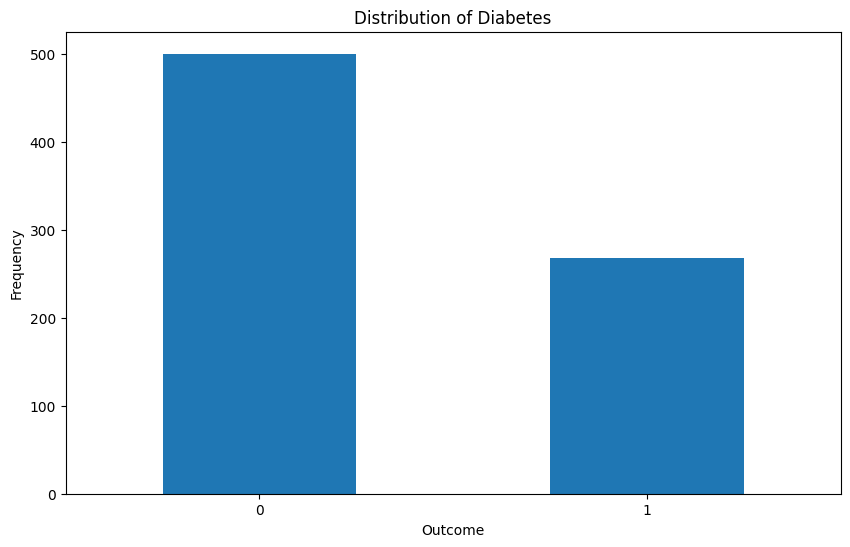

In [5]:
counts = data['Outcome'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.title('Distribution of Diabetes')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

## Correlation Heatmap

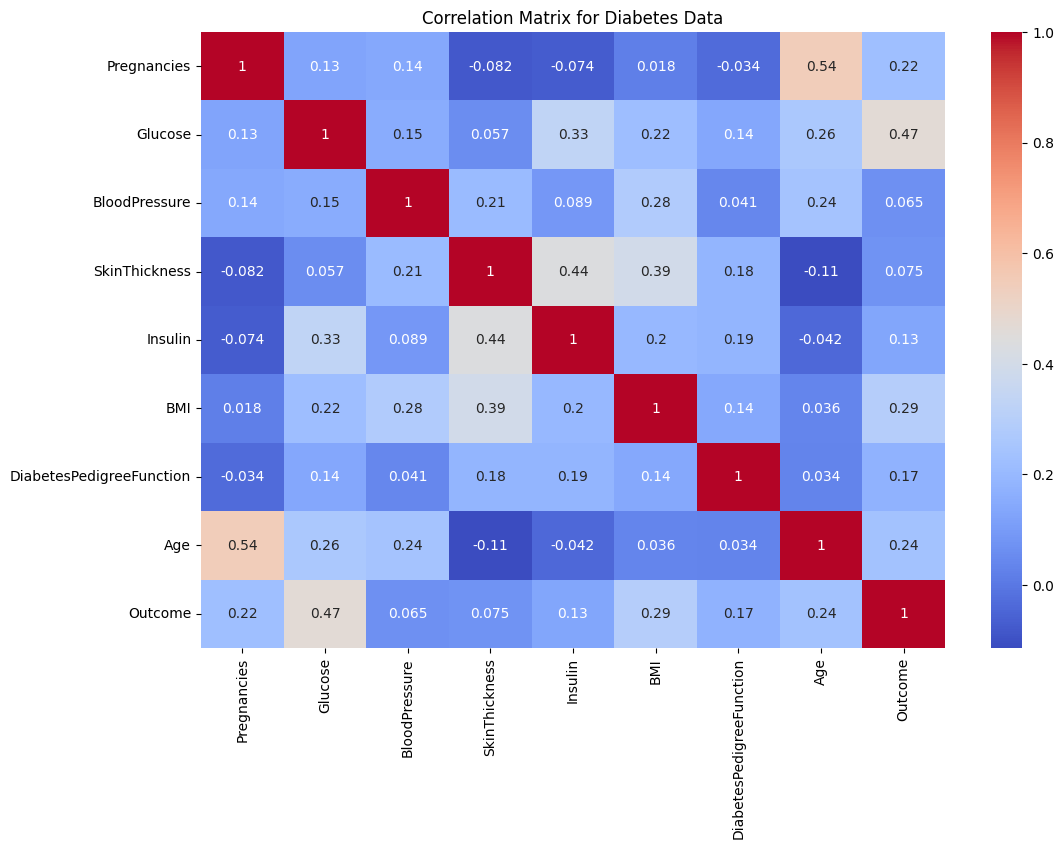

In [6]:
correlation_matrix = data.corr()

# 상관관계 행렬을 이용한 히트맵 생성
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Diabetes Data')
plt.show()

## Split Data

In [7]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"============= train set =============\nX_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"============= test  set =============\nX_test:  {X_test.shape}, y_test:  {y_test.shape}\n=====================================")

============= train set =============
X_train: (537, 8), y_train: (537,)
============= test  set =============
X_test:  (231, 8), y_test:  (231,)


## Train Models

### Logistic Regression

In [8]:
# =================train model================
# train
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# predict
lr_y_train = lr_model.predict(X_train)
lr_y_test = lr_model.predict(X_test)
# ============================================

# ==================Accuracy==================
lr_train_acc = round(accuracy_score(y_train, lr_y_train)*100, 2)
lr_acc = round(accuracy_score(y_test, lr_y_test)*100, 2)
# ============================================
print(f"Accuracy of LR train : {lr_train_acc}")
print(f"Accuracy of LR test  : {lr_acc}")

Accuracy of LR train : 78.21
Accuracy of LR test  : 74.03


### LDA

In [9]:
# =================train model================
# train
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# predict
lda_y_train = lda_model.predict(X_train)
lda_y_test = lda_model.predict(X_test)
# ============================================

# ==================Accuracy==================
lda_train_acc = round(accuracy_score(y_train, lda_y_train)*100, 2)
lda_acc = round(accuracy_score(y_test, lda_y_test)*100, 2)
# ============================================
print(f"Accuracy of LDA train : {lda_train_acc}")
print(f"Accuracy of LDA test  : {lda_acc}")

Accuracy of LDA train : 77.84
Accuracy of LDA test  : 73.16


### QDA

In [10]:
# =================train model================
# train
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

# predict
qda_y_train = qda_model.predict(X_train)
qda_y_test = qda_model.predict(X_test)
# ============================================

# ==================Accuracy==================
qda_train_acc = round(accuracy_score(y_train, qda_y_train)*100, 2)
qda_acc = round(accuracy_score(y_test, qda_y_test)*100, 2)
# ============================================
print(f"Accuracy of QDA train : {qda_train_acc}")
print(f"Accuracy of QDA test  : {qda_acc}")

Accuracy of QDA train : 76.54
Accuracy of QDA test  : 76.62


### Naïve Bayes

In [11]:
# =================train model================
# train
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# predict
nb_y_train = nb_model.predict(X_train)
nb_y_test = nb_model.predict(X_test)
# ============================================

# ==================Accuracy==================
nb_train_acc = round(accuracy_score(y_train, nb_y_train)*100, 2)
nb_test_acc = round(accuracy_score(y_test, nb_y_test)*100, 2)
# ============================================
print(f"Accuracy of NB train : {nb_train_acc}")
print(f"Accuracy of NB test  : {nb_test_acc}")

Accuracy of NB train : 76.72
Accuracy of NB test  : 74.46


### Decision Tree

In [12]:
# =================train model================
# train
clf_dt = DecisionTreeClassifier(random_state=42, max_depth=10, ccp_alpha=0.01) 
clf_dt.fit(X_train, y_train)

# predict
clf_y_train = clf_dt.predict(X_train)
clf_y_test = clf_dt.predict(X_test)
# ============================================

# ==================Accuracy==================
clf_dt_train_acc = accuracy_score(y_train, clf_y_train)
clf_dt_test_acc = accuracy_score(y_test, clf_y_test)
# ============================================
print(f"Accuracy of Classification Tree train : {round((clf_dt_train_acc)*100, 2)}")
print(f"Accuracy of Classification Tree test  : {round((clf_dt_test_acc)*100, 2)}")

Accuracy of Classification Tree train : 78.4
Accuracy of Classification Tree test  : 71.86


#### Visualization

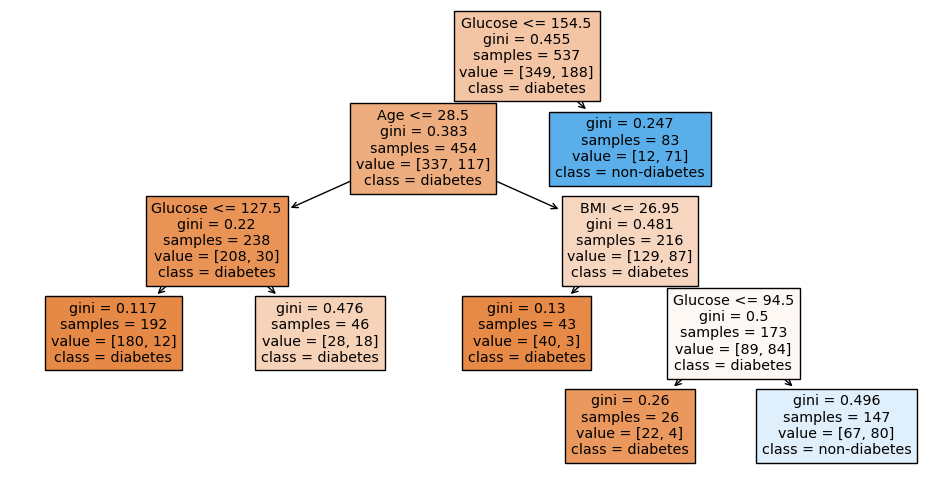

In [13]:
plt.figure(figsize=(12,6))
plot_tree(clf_dt, filled=True, feature_names=X_train.columns, class_names=["diabetes", "non-diabetes"])
plt.show()

#### pruning

In [14]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = np.abs(ccp_alphas) # 부동 소수점에 의한 음수값 없애기 위한 작업

In [15]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42, max_depth=10, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clfs.append(clf_dt)
    
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

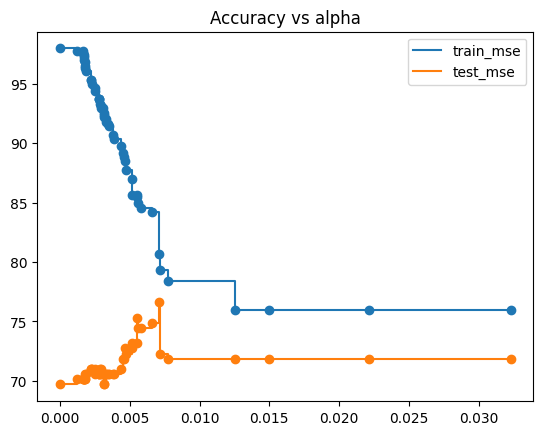

Best alpha: 0.0


In [16]:
train_acc = []
test_acc = []
for clf in clfs:
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    train_acc.append(round((accuracy_score(y_train, y_train_pred)*100), 2))
    test_acc.append(round((accuracy_score(y_test, y_test_pred)*100), 2))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_mse',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_mse',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

best_alpha = round(ccp_alphas[test_acc.index(min(test_acc))], 5)
print(f"Best alpha: {best_alpha}")

#### Best Model

In [17]:
best_clf_dt = DecisionTreeClassifier(random_state=42, max_depth=10, ccp_alpha=best_alpha)
best_clf_dt.fit(X_train, y_train)

clf_y_train = best_clf_dt.predict(X_train)
clf_y_test = best_clf_dt.predict(X_test)

best_clf_dt_train_acc = accuracy_score(y_train, clf_y_train)
best_clf_dt_test_acc = accuracy_score(y_test, clf_y_test)

print(f"Accuracy of the Best Regression Tree train : {round((best_clf_dt_train_acc)*100, 5)}")
print(f"Accuracy of the Best Regression Tree test  : {round((best_clf_dt_test_acc)*100, 5)}")

Accuracy of the Best Regression Tree train : 97.95158
Accuracy of the Best Regression Tree test  : 69.69697


#### Visualization

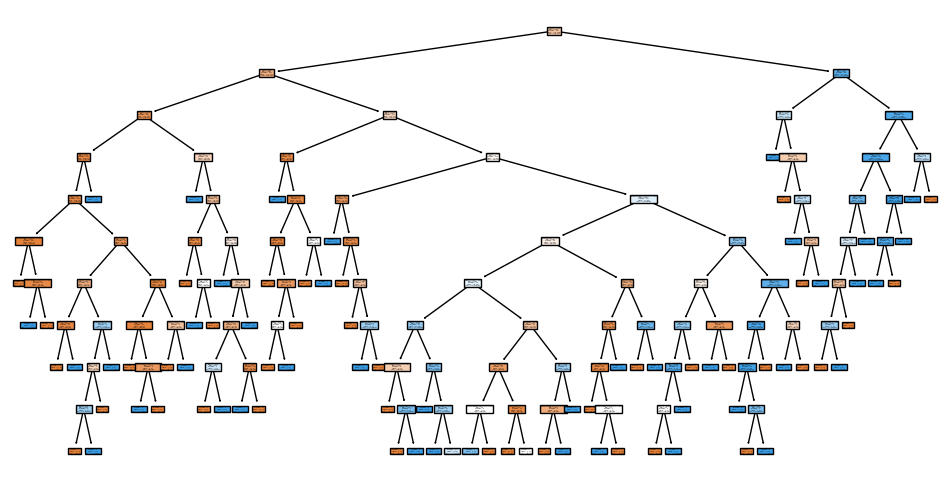

In [18]:
plt.figure(figsize=(12,6))
plot_tree(best_clf_dt,feature_names=X_train.columns,class_names=["diabetes", "non-diabetes"],filled=True)
plt.show()

### Bagging

In [19]:
# =================train model================
# train
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42, max_depth=10, ccp_alpha=best_alpha), n_estimators=5, random_state=42)
bagging_clf.fit(X_train, y_train)

# predict
bagging_clf_y_train = bagging_clf.predict(X_train)
bagging_clf_y_test = bagging_clf.predict(X_test)
# ============================================

# ==================Accuracy==================
bagging_clf_train_acc = accuracy_score(y_train, bagging_clf_y_train)
bagging_clf_test_acc = accuracy_score(y_test, bagging_clf_y_test)
# ============================================
print(f"Accuracy of Bagging Classification Tree train : {round((bagging_clf_train_acc)*100, 2)}")
print(f"Accuracy of Bagging Classification Tree test  : {round((bagging_clf_test_acc)*100, 2)}")

Accuracy of Bagging Classification Tree train : 95.53
Accuracy of Bagging Classification Tree test  : 72.29


### Random Forest

In [20]:
# =================train model================
# train
clf_rf = RandomForestClassifier(random_state=42, max_depth=10, ccp_alpha=0.01) 
clf_rf.fit(X_train, y_train)

# predict
clf_y_train = clf_rf.predict(X_train)
clf_y_test = clf_rf.predict(X_test)
# ============================================

# ==================Accuracy==================
clf_rf_train_acc = accuracy_score(y_train, clf_y_train)
clf_rf_test_acc = accuracy_score(y_test, clf_y_test)
# ============================================
print(f"Accuracy of Classification Tree train : {round((clf_rf_train_acc)*100, 2)}")
print(f"Accuracy of Classification Tree test  : {round((clf_rf_test_acc)*100, 2)}")

Accuracy of Classification Tree train : 81.19
Accuracy of Classification Tree test  : 74.03


#### Hyper-parameter Tuning

In [21]:
# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None], 
    'ccp_alpha':[0.1, 0.05, 0.01, 0.005] 
}

# 그리드 서치 객체 생성 및 학습
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.1, 0.05, 0.01, 0.005],
                         'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [22]:
# 최적의 하이퍼파라미터와 오류 확인
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'ccp_alpha': 0.005, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 300}
Best CV Score: -0.22170301142263757


#### Best Model

In [23]:
# =================train model================
# train
best_clf_rf = RandomForestClassifier(random_state=42, **grid_search.best_params_) 
best_clf_rf.fit(X_train, y_train)

# predict
clf_y_train = best_clf_rf.predict(X_train)
clf_y_test = best_clf_rf.predict(X_test)
# ============================================

# ==================Accuracy==================
best_clf_rf_train_acc = accuracy_score(y_train, clf_y_train)
best_clf_rf_test_acc = accuracy_score(y_test, clf_y_test)
# ============================================
print(f"Accuracy of Classification Tree train : {round((best_clf_rf_train_acc)*100, 2)}")
print(f"Accuracy of Classification Tree test  : {round((best_clf_rf_test_acc)*100, 2)}")

Accuracy of Classification Tree train : 90.88
Accuracy of Classification Tree test  : 75.32


### AdaBoosting

In [24]:
# =================train model================
# train
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42, max_depth=10, ccp_alpha=0.1), n_estimators=10, random_state=42)
ada.fit(X_train, y_train)

# predict
ada_y_train = ada.predict(X_train)
ada_y_test = ada.predict(X_test)

# ==================Accuracy==================
ada_train_acc = accuracy_score(y_train, ada_y_train)
ada_test_acc = accuracy_score(y_test, ada_y_test)
# ============================================
print(f"Accuracy of AdaBoosting train : {round((ada_train_acc)*100, 2)}")
print(f"Accuracy of AdaBoosting test  : {round((ada_test_acc)*100, 2)}")

Accuracy of AdaBoosting train : 74.67
Accuracy of AdaBoosting test  : 71.0


#### pruning

In [25]:
# =================train model================
# train
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42, max_depth=10, ccp_alpha=best_alpha), n_estimators=10, random_state=42)
ada.fit(X_train, y_train)

# predict
ada_y_train = ada.predict(X_train)
ada_y_test = ada.predict(X_test)

#==================Accuracy==================
best_ada_train_acc = accuracy_score(y_train, ada_y_train)
best_ada_test_acc = accuracy_score(y_test, ada_y_test)
# ============================================
print(f"Accuracy of AdaBoosting train : {round((best_ada_train_acc)*100, 2)}")
print(f"Accuracy of AdaBoosting test  : {round((best_ada_test_acc)*100, 2)}")

Accuracy of AdaBoosting train : 100.0
Accuracy of AdaBoosting test  : 74.03


### Gradient Boosting

In [26]:
# =================train model================
# train
gb = GradientBoostingClassifier(random_state=42, ccp_alpha=best_alpha)
gb.fit(X_train, y_train)

# predict
gb_y_train = gb.predict(X_train)
gb_y_test = gb.predict(X_test)

# ==================Accuracy==================
gb_train_acc = accuracy_score(y_train, gb_y_train)
gb_test_acc = accuracy_score(y_test, gb_y_test)
# ============================================
print(f"Accuracy of Gradient Boosting train : {round((gb_train_acc)*100, 2)}")
print(f"Accuracy of Gradient Boosting test  : {round((gb_test_acc)*100, 2)}")

Accuracy of Gradient Boosting train : 94.97
Accuracy of Gradient Boosting test  : 74.89


### Linear SVM Classifier

In [27]:
# =================train model================
# train
linear_svm = LinearSVC(random_state=42) # defalut C=1.0
linear_svm.fit(X_train, y_train)

# predict
linear_svm_y_train = linear_svm.predict(X_train)
linear_svm_y_test = linear_svm.predict(X_test)

# ==================Accuracy==================
linear_svm_train_acc = accuracy_score(y_train, linear_svm_y_train)
linear_svm_test_acc = accuracy_score(y_test, linear_svm_y_test)
# ============================================
print(f"Accuracy of Linear SVM train : {round((linear_svm_train_acc)*100, 2)}")
print(f"Accuracy of Linear SVM test  : {round((linear_svm_test_acc)*100, 2)}")

Accuracy of Linear SVM train : 66.85
Accuracy of Linear SVM test  : 67.53


### Kernel SVM Calssifier

In [28]:
# =================train model================
# train
kernel_svm = SVC(C=1) # defalut C=1.0 / default kernel=radial / default gamma='scale'
kernel_svm.fit(X_train, y_train)

# predict
kernel_svm_y_train = kernel_svm.predict(X_train)
kernel_svm_y_test = kernel_svm.predict(X_test)

# ==================Accuracy==================
kernel_svm_train_acc = accuracy_score(y_train, kernel_svm_y_train)
kernel_svm_test_acc = accuracy_score(y_test, kernel_svm_y_test)
# ============================================
print(f"Accuracy of Kernel SVM train : {round((kernel_svm_train_acc)*100, 2)}")
print(f"Accuracy of Kernel SVM test  : {round((kernel_svm_test_acc)*100, 2)}")

Accuracy of Kernel SVM train : 78.03
Accuracy of Kernel SVM test  : 73.59


#### Hyper-parameter Tuning

In [29]:
# 하이퍼파라미터 그리드 정의
param_grid = {
    'C': [0.1, 0.5, 1, 5, 10, 50, 100],
    'gamma': ['scale', 'auto']
}

# 그리드 서치 객체 생성 및 학습
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10, 50, 100],
                         'gamma': ['scale', 'auto']},
             scoring='neg_mean_squared_error')

In [30]:
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'C': 50, 'gamma': 'scale'}
Best CV Score: -0.2384735202492212


#### Best Model

In [31]:
# =================train model================
# train
kernel_svm = SVC(**grid_search.best_params_) # defalut C=1.0 / default kernel=radial / default gamma='scale'
kernel_svm.fit(X_train, y_train)

# predict
kernel_svm_y_train = kernel_svm.predict(X_train)
kernel_svm_y_test = kernel_svm.predict(X_test)

# ==================Accuracy==================
best_kernel_svm_train_acc = accuracy_score(y_train, kernel_svm_y_train)
best_kernel_svm_test_acc = accuracy_score(y_test, kernel_svm_y_test)
# ============================================
print(f"Accuracy of Kernel SVM train : {round((best_kernel_svm_train_acc)*100, 2)}")
print(f"Accuracy of Kernel SVM test  : {round((best_kernel_svm_test_acc)*100, 2)}")

Accuracy of Kernel SVM train : 81.19
Accuracy of Kernel SVM test  : 74.03


## Result

In [32]:
print("=================Accuracy===============")
print("Model\t\t\t| Train\t| Test")
print("------------------------|-------|-------")
print(f"Logistic Regression\t| {lr_train_acc}\t| {lr_acc}")
print(f"LDA\t\t\t| {lda_train_acc}\t| {lda_acc}")
print(f"QDA\t\t\t| {qda_train_acc}\t| {qda_acc}")
print(f"Naïve Bayes\t\t| {nb_train_acc}\t| {nb_test_acc}")
print(f"Decision Tree\t\t| {round(clf_dt_train_acc * 100, 2)}\t| {round(clf_dt_test_acc * 100, 2)}")
print(f"Decision Tree (Pruned)\t| {round(best_clf_dt_train_acc * 100, 2)}\t| {round(best_clf_dt_test_acc * 100, 2)}")
print(f"Bagging\t\t\t| {round(bagging_clf_train_acc * 100, 2)}\t| {round(bagging_clf_test_acc * 100, 2)}")
print(f"Random Forest\t\t| {round(clf_rf_train_acc * 100, 2)}\t| {round(clf_rf_test_acc * 100, 2)}")
print(f"Random Forest (Tuned)\t| {round(best_clf_rf_train_acc * 100, 2)}\t| {round(best_clf_rf_test_acc * 100, 2)}")
print(f"Ada Boosting\t\t| {round(ada_train_acc * 100, 2)}\t| {round(ada_test_acc * 100, 2)}")
print(f"Ada Boosting (Pruned)\t| {round(best_ada_train_acc * 100, 2)}\t| {round(best_ada_test_acc * 100, 2)}")
print(f"Gradient Boosting\t| {round(gb_train_acc * 100, 2)}\t| {round(gb_test_acc * 100, 2)}")
print(f"Linear SVM\t\t| {round(linear_svm_train_acc * 100, 2)}\t| {round(linear_svm_test_acc * 100, 2)}")
print(f"Kernel SVM\t\t| {round(kernel_svm_train_acc * 100, 2)}\t| {round(kernel_svm_test_acc * 100, 2)}")
print(f"Kernel SVM (Tuned)\t| {round(best_kernel_svm_train_acc * 100, 2)}\t| {round(best_kernel_svm_test_acc * 100, 2)}")
print("========================================")

=================Accuracy===============
Model			| Train	| Test
------------------------|-------|-------
Logistic Regression	| 78.21	| 74.03
LDA			| 77.84	| 73.16
QDA			| 76.54	| 76.62
Naïve Bayes		| 76.72	| 74.46
Decision Tree		| 78.4	| 71.86
Decision Tree (Pruned)	| 97.95	| 69.7
Bagging			| 95.53	| 72.29
Random Forest		| 81.19	| 74.03
Random Forest (Tuned)	| 90.88	| 75.32
Ada Boosting		| 74.67	| 71.0
Ada Boosting (Pruned)	| 100.0	| 74.03
Gradient Boosting	| 94.97	| 74.89
Linear SVM		| 66.85	| 67.53
Kernel SVM		| 78.03	| 73.59
Kernel SVM (Tuned)	| 81.19	| 74.03
